### 未进行正则化，可能导致过拟合

Epoch 1/20, Training: 100%|██████████| 156/156 [00:18<00:00,  8.28it/s, loss=0.12] 


Epoch 1/20, Training Loss: 0.9135, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9334


Epoch 2/20, Training: 100%|██████████| 156/156 [00:18<00:00,  8.37it/s, loss=0.0418]


Epoch 2/20, Training Loss: 0.0873, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9172


Epoch 3/20, Training: 100%|██████████| 156/156 [00:18<00:00,  8.40it/s, loss=0.0412]


Epoch 3/20, Training Loss: 0.0447, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9073


Epoch 4/20, Training: 100%|██████████| 156/156 [00:18<00:00,  8.37it/s, loss=0.0712] 


Epoch 4/20, Training Loss: 0.0315, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9109


Epoch 5/20, Training: 100%|██████████| 156/156 [00:18<00:00,  8.45it/s, loss=0.0529] 


Epoch 5/20, Training Loss: 0.0248, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9109


Epoch 6/20, Training: 100%|██████████| 156/156 [00:19<00:00,  8.00it/s, loss=0.0154] 


Epoch 6/20, Training Loss: 0.0212, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9100


Epoch 7/20, Training: 100%|██████████| 156/156 [00:20<00:00,  7.63it/s, loss=0.0209] 


Epoch 7/20, Training Loss: 0.0183, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9109


Epoch 8/20, Training: 100%|██████████| 156/156 [00:22<00:00,  7.06it/s, loss=0.00936]


Epoch 8/20, Training Loss: 0.0163, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9091


Epoch 9/20, Training: 100%|██████████| 156/156 [00:20<00:00,  7.44it/s, loss=0.0152] 


Epoch 9/20, Training Loss: 0.0144, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9145


Epoch 10/20, Training: 100%|██████████| 156/156 [00:19<00:00,  8.02it/s, loss=0.00391]


Epoch 10/20, Training Loss: 0.0135, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9136


Epoch 11/20, Training: 100%|██████████| 156/156 [00:19<00:00,  7.85it/s, loss=0.000681]


Epoch 11/20, Training Loss: 0.0132, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9109


Epoch 12/20, Training: 100%|██████████| 156/156 [00:20<00:00,  7.58it/s, loss=0.000683]


Epoch 12/20, Training Loss: 0.0123, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9082


Epoch 13/20, Training: 100%|██████████| 156/156 [00:20<00:00,  7.53it/s, loss=0.00665] 


Epoch 13/20, Training Loss: 0.0122, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9127


Epoch 14/20, Training: 100%|██████████| 156/156 [00:20<00:00,  7.54it/s, loss=0.0228]  


Epoch 14/20, Training Loss: 0.0114, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9055


Epoch 15/20, Training: 100%|██████████| 156/156 [00:21<00:00,  7.32it/s, loss=0.000702]


Epoch 15/20, Training Loss: 0.0116, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9082


Epoch 16/20, Training: 100%|██████████| 156/156 [00:19<00:00,  7.99it/s, loss=0.00162] 


Epoch 16/20, Training Loss: 0.0112, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9019


Epoch 17/20, Training: 100%|██████████| 156/156 [00:19<00:00,  8.19it/s, loss=0.00262] 


Epoch 17/20, Training Loss: 0.0106, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9037


Epoch 18/20, Training: 100%|██████████| 156/156 [00:19<00:00,  7.85it/s, loss=0.00399] 


Epoch 18/20, Training Loss: 0.0107, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9082


Epoch 19/20, Training: 100%|██████████| 156/156 [00:18<00:00,  8.38it/s, loss=0.000732]


Epoch 19/20, Training Loss: 0.0101, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9127


Epoch 20/20, Training: 100%|██████████| 156/156 [00:18<00:00,  8.58it/s, loss=0.000645]


Epoch 20/20, Training Loss: 0.0098, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.8938


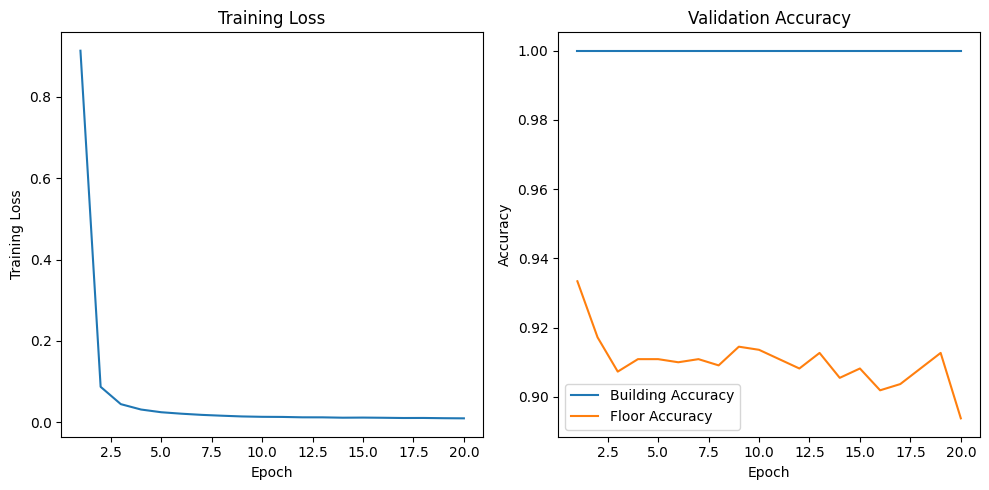

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可复现
torch.manual_seed(2077)

# 检查是否有可用的GPU，如果有，则使用GPU训练，否则使用CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 定义神经网络模型
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, building_output_size, floor_output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.tanh = nn.Tanh()
        self.fc_building = nn.Linear(hidden_size, building_output_size)
        self.fc_floor = nn.Linear(hidden_size, floor_output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.tanh(x)
        building_output = self.fc_building(x)
        floor_output = self.fc_floor(x)
        return building_output, floor_output

# 定义自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        features = self.data.iloc[idx, :520].values.astype('float32')
        building_label = self.data.loc[idx, "BUILDINGID"].astype('int64')
        floor_label = self.data.loc[idx, "FLOOR"].astype('int64')

        return torch.from_numpy(features), building_label, floor_label

# 加载训练集和验证集的数据
train_dataset = CustomDataset('trainingData.csv')
val_dataset = CustomDataset('validationData.csv')

# 获取WiFi指纹的强度值
train_wifi_strengths = train_dataset.data.iloc[:, :520].values
val_wifi_strengths = val_dataset.data.iloc[:, :520].values

# 对WiFi指纹的强度值进行最小-最大缩放归一化
train_min = -104  # WiFi指纹的最小值
train_max = 0  # WiFi指纹的最大值

train_wifi_strengths_normalized = (train_wifi_strengths - train_min) / (train_max - train_min)
val_wifi_strengths_normalized = (val_wifi_strengths - train_min) / (train_max - train_min)

# 将未检测到WAP的强度值100归一化到0
train_wifi_strengths_normalized[train_wifi_strengths == 100] = 0
val_wifi_strengths_normalized[val_wifi_strengths == 100] = 0

# 将归一化后的WiFi指纹更新到数据集中
train_dataset.data.iloc[:, :520] = train_wifi_strengths_normalized
val_dataset.data.iloc[:, :520] = val_wifi_strengths_normalized


# 定义批量大小和迭代器
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 初始化模型
input_size = 520
hidden_size = 128
building_output_size = 3  # BUILDINGID的分类数
floor_output_size = 5  # FLOOR的分类数
model = Net(input_size, hidden_size, building_output_size, floor_output_size).to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练和测试
num_epochs = 20
train_loss_history = []
val_building_accuracy_history = []
val_floor_accuracy_history = []

for epoch in range(num_epochs):
    # 训练阶段
    model.train()
    train_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}, Training')

    for inputs, building_labels, floor_labels in progress_bar:
        inputs = inputs.to(device)
        building_labels = building_labels.to(device)
        floor_labels = floor_labels.to(device)

        optimizer.zero_grad()
        building_output, floor_output = model(inputs)
        building_loss = criterion(building_output, building_labels)
        floor_loss = criterion(floor_output, floor_labels)
        loss = building_loss + floor_loss
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        progress_bar.set_postfix({'loss': loss.item()})

    train_loss = train_loss / len(train_dataset)
    train_loss_history.append(train_loss)

    # 验证阶段
    model.eval()
    building_correct = 0
    floor_correct = 0
    total = 0

    with torch.no_grad():
        for inputs, building_labels, floor_labels in val_loader:
            inputs = inputs.to(device)
            building_labels = building_labels.to(device)
            floor_labels = floor_labels.to(device)

            building_output, floor_output = model(inputs)
            _, building_predicted = torch.max(building_output.data, 1)
            _, floor_predicted = torch.max(floor_output.data, 1)

            total += building_labels.size(0)
            building_correct += (building_predicted == building_labels).sum().item()
            floor_correct += (floor_predicted == floor_labels).sum().item()

    val_building_accuracy = building_correct / total
    val_floor_accuracy = floor_correct / total
    val_building_accuracy_history.append(val_building_accuracy)
    val_floor_accuracy_history.append(val_floor_accuracy)

    tqdm.write(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss:.4f}, '
               f'Validation Building Accuracy: {val_building_accuracy:.4f}, '
               f'Validation Floor Accuracy: {val_floor_accuracy:.4f}')

# 绘制训练损失和验证准确率的图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_building_accuracy_history, label='Building Accuracy')
plt.plot(range(1, num_epochs + 1), val_floor_accuracy_history, label='Floor Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### 为了防止过拟合加入早停与Drop操作

Epoch 1/20, Training: 100%|██████████| 156/156 [00:18<00:00,  8.50it/s, loss=0.192]


Epoch 1/20, Training Loss: 0.9949, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9388


Epoch 2/20, Training: 100%|██████████| 156/156 [00:17<00:00,  8.89it/s, loss=0.0954]


Epoch 2/20, Training Loss: 0.1307, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9316


Epoch 3/20, Training: 100%|██████████| 156/156 [00:17<00:00,  8.89it/s, loss=0.0865]


Epoch 3/20, Training Loss: 0.0702, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9109


Epoch 4/20, Training: 100%|██████████| 156/156 [00:17<00:00,  8.92it/s, loss=0.0771]


Epoch 4/20, Training Loss: 0.0523, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9127


Epoch 5/20, Training: 100%|██████████| 156/156 [00:17<00:00,  8.93it/s, loss=0.0608]


Epoch 5/20, Training Loss: 0.0406, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9100


Epoch 6/20, Training: 100%|██████████| 156/156 [00:17<00:00,  8.97it/s, loss=0.0412] 


Epoch 6/20, Training Loss: 0.0341, Validation Building Accuracy: 1.0000, Validation Floor Accuracy: 0.9091
Early stopping. No improvement in validation accuracy.


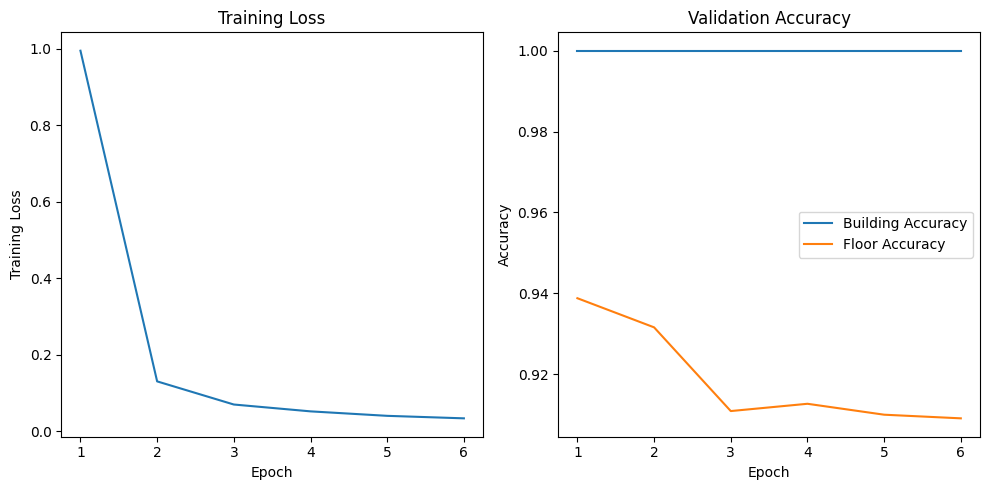

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import matplotlib.pyplot as plt

# 设置随机种子以确保结果可复现
torch.manual_seed(2077)

# 检查是否有可用的GPU，如果有，则使用GPU训练，否则使用CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 定义神经网络模型
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, building_output_size, floor_output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.tanh = nn.Tanh()
        self.dropout = nn.Dropout(0.5)  # 添加Dropout层
        self.fc_building = nn.Linear(hidden_size, building_output_size)
        self.fc_floor = nn.Linear(hidden_size, floor_output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.dropout(x)  # 在全连接层后应用Dropout
        x = self.fc2(x)
        x = self.tanh(x)
        building_output = self.fc_building(x)
        floor_output = self.fc_floor(x)
        return building_output, floor_output

# 定义自定义数据集类
class CustomDataset(Dataset):
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        features = self.data.iloc[idx, :520].values.astype('float32')
        building_label = self.data.loc[idx, "BUILDINGID"].astype('int64')
        floor_label = self.data.loc[idx, "FLOOR"].astype('int64')

        return torch.from_numpy(features), building_label, floor_label

# 加载训练集和验证集的数据
train_dataset = CustomDataset('trainingData.csv')
val_dataset = CustomDataset('validationData.csv')

# 获取WiFi指纹的强度值
train_wifi_strengths = train_dataset.data.iloc[:, :520].values
val_wifi_strengths = val_dataset.data.iloc[:, :520].values

# 对WiFi指纹的强度值进行最小-最大缩放归一化
train_min = -104  # WiFi指纹的最小值
train_max = 0  # WiFi指纹的最大值

train_wifi_strengths_normalized = (train_wifi_strengths - train_min) / (train_max - train_min)
val_wifi_strengths_normalized = (val_wifi_strengths - train_min) / (train_max - train_min)

# 将未检测到WAP的强度值100归一化到0
train_wifi_strengths_normalized[train_wifi_strengths == 100] = 0
val_wifi_strengths_normalized[val_wifi_strengths == 100] = 0

# 将归一化后的WiFi指纹更新到数据集中
train_dataset.data.iloc[:, :520] = train_wifi_strengths_normalized
val_dataset.data.iloc[:, :520] = val_wifi_strengths_normalized


# 定义批量大小和迭代器
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# 初始化模型
input_size = 520
hidden_size = 128
building_output_size = 3  # BUILDINGID的分类数
floor_output_size = 5  # FLOOR的分类数
model = Net(input_size, hidden_size, building_output_size, floor_output_size).to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练和测试
num_epochs = 20
train_loss_history = []
val_building_accuracy_history = []
val_floor_accuracy_history = []


best_val_accuracy = [0.0, 0.0]  # 记录最佳验证集准确率[建筑，楼层]
patience = 5  # 提前停止的耐心度
no_improvement = 0  # 连续验证集准确率未提升的轮数

for epoch in range(num_epochs):
    # 训练阶段
    model.train()
    train_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}, Training')

    for inputs, building_labels, floor_labels in progress_bar:
        inputs = inputs.to(device)
        building_labels = building_labels.to(device)
        floor_labels = floor_labels.to(device)

        optimizer.zero_grad()
        building_output, floor_output = model(inputs)
        building_loss = criterion(building_output, building_labels)
        floor_loss = criterion(floor_output, floor_labels)
        loss = building_loss + floor_loss
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * inputs.size(0)
        progress_bar.set_postfix({'loss': loss.item()})

    train_loss = train_loss / len(train_dataset)
    train_loss_history.append(train_loss)

    # 验证阶段
    model.eval()
    building_correct = 0
    floor_correct = 0
    total = 0

    with torch.no_grad():
        for inputs, building_labels, floor_labels in val_loader:
            inputs = inputs.to(device)
            building_labels = building_labels.to(device)
            floor_labels = floor_labels.to(device)

            building_output, floor_output = model(inputs)
            _, building_predicted = torch.max(building_output.data, 1)
            _, floor_predicted = torch.max(floor_output.data, 1)

            total += building_labels.size(0)
            building_correct += (building_predicted == building_labels).sum().item()
            floor_correct += (floor_predicted == floor_labels).sum().item()

    val_building_accuracy = building_correct / total
    val_floor_accuracy = floor_correct / total
    val_building_accuracy_history.append(val_building_accuracy)
    val_floor_accuracy_history.append(val_floor_accuracy)

    tqdm.write(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss:.4f}, '
               f'Validation Building Accuracy: {val_building_accuracy:.4f}, '
               f'Validation Floor Accuracy: {val_floor_accuracy:.4f}')

    # 提前停止
    if sum([val_building_accuracy,  val_floor_accuracy]) > sum(best_val_accuracy):
        best_val_accuracy = [val_building_accuracy,  val_floor_accuracy]
        no_improvement = 0
    else:
        no_improvement += 1
        if no_improvement >= patience:
            print("Early stopping. No improvement in validation accuracy.")
            break

# 绘制训练损失和验证准确率的图像
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_history) + 1), train_loss_history)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, len(val_building_accuracy_history) + 1), val_building_accuracy_history, label='Building Accuracy')
plt.plot(range(1, len(val_floor_accuracy_history) + 1), val_floor_accuracy_history, label='Floor Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### 与传统机器学习模型对比

SVM Building Accuracy: 0.9972997299729973
SVM Floor Accuracy: 0.8091809180918091
KNN Building Accuracy: 0.990999099909991
KNN Floor Accuracy: 0.7326732673267327


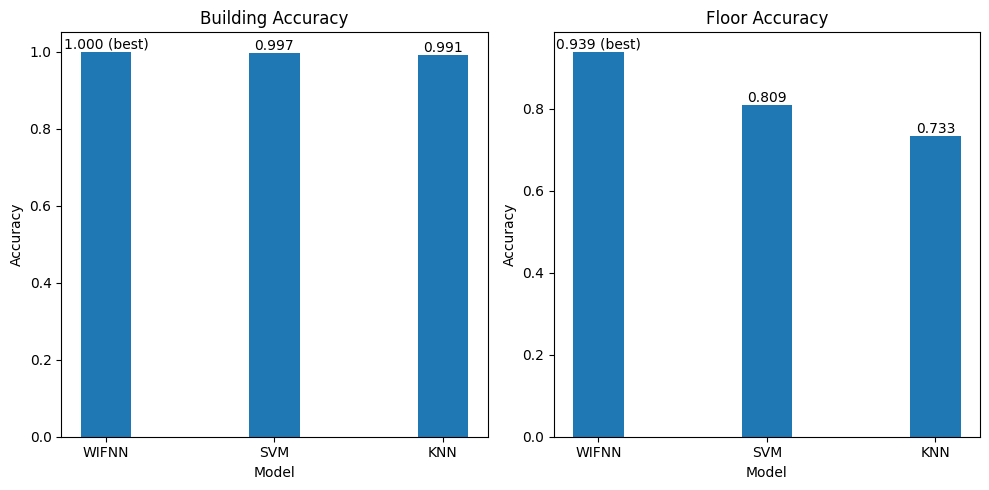

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 加载训练集和验证集的数据
train_data = pd.read_csv('trainingData.csv')
val_data = pd.read_csv('validationData.csv')

# 提取特征和标签
X_train = train_data.iloc[:, :520]
y_train_building = train_data["BUILDINGID"]
y_train_floor = train_data["FLOOR"]

X_val = val_data.iloc[:, :520]
y_val_building = val_data["BUILDINGID"]
y_val_floor = val_data["FLOOR"]

# 创建SVM模型并进行建筑物预测训练
svm_model_building = svm.SVC()
svm_model_building.fit(X_train, y_train_building)
svm_predictions_building = svm_model_building.predict(X_val)

svm_accuracy_building = accuracy_score(y_val_building, svm_predictions_building)
print("SVM Building Accuracy:", svm_accuracy_building)

# 创建SVM模型并进行楼层预测训练
svm_model_floor = svm.SVC()
svm_model_floor.fit(X_train, y_train_floor)
svm_predictions_floor = svm_model_floor.predict(X_val)

svm_accuracy_floor = accuracy_score(y_val_floor, svm_predictions_floor)
print("SVM Floor Accuracy:", svm_accuracy_floor)

# 创建KNN模型并进行建筑物预测训练
knn_model_building = KNeighborsClassifier()
knn_model_building.fit(X_train, y_train_building)
knn_predictions_building = knn_model_building.predict(X_val)

knn_accuracy_building = accuracy_score(y_val_building, knn_predictions_building)
print("KNN Building Accuracy:", knn_accuracy_building)

# 创建KNN模型并进行楼层预测训练
knn_model_floor = KNeighborsClassifier()
knn_model_floor.fit(X_train, y_train_floor)
knn_predictions_floor = knn_model_floor.predict(X_val)

knn_accuracy_floor = accuracy_score(y_val_floor, knn_predictions_floor)
print("KNN Floor Accuracy:", knn_accuracy_floor)


# 创建柱状图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
models = ['WIFNN', 'SVM', 'KNN']
building_accuracies = [best_val_accuracy[0], svm_accuracy_building, knn_accuracy_building]
plt.bar(models, building_accuracies, width=0.3)
for i, accuracy in enumerate(building_accuracies):
    label = f"{accuracy:.3f}"
    if accuracy == max(building_accuracies):
        label += " (best)"
    plt.text(i, accuracy, label, ha='center', va='bottom')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Building Accuracy')

plt.subplot(1, 2, 2)
floor_accuracies = [best_val_accuracy[1], svm_accuracy_floor, knn_accuracy_floor]
plt.bar(models, floor_accuracies, width=0.3)
for i, accuracy in enumerate(floor_accuracies):
    label = f"{accuracy:.3f}"
    if accuracy == max(floor_accuracies):
        label += " (best)"
    plt.text(i, accuracy, label, ha='center', va='bottom')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Floor Accuracy')

plt.tight_layout()
plt.show()
